# MNIST Handwritten Digit Classifier - Convoluntion Neural Network

Given a dataset of 6,000 images of handwritten digits, train a convoluntion neural network (CNN) to identify the number.

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training and test sets.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Show one example digit.

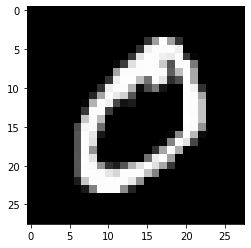

In [4]:
plt.imshow(X_train[1], cmap='gray')

In [5]:
y_train[1]

0

Prepare features and target for training.

In [6]:
image_height,image_width = 28, 28

X_train = X_train.reshape(60000, image_height, image_width, 1)
X_test = X_test.reshape(10000, image_height, image_width, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Train a convolution neural network.

In [8]:
model = Sequential()

In [11]:
model.add(Conv2D(8, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(8, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1608      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 4)                 1

In [14]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.7568 - accuracy: 0.7498 - val_loss: 0.3889 - val_accuracy: 0.8856
Epoch 2/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.3881 - accuracy: 0.8909 - val_loss: 0.3124 - val_accuracy: 0.9060
Epoch 3/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.3169 - accuracy: 0.9122 - val_loss: 0.2861 - val_accuracy: 0.9136
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2769 - accuracy: 0.9231 - val_loss: 0.2321 - val_accuracy: 0.9315
Epoch 5/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2438 - accuracy: 0.9324 - val_loss: 0.2141 - val_accuracy: 0.9406


Evaluate the model performance.

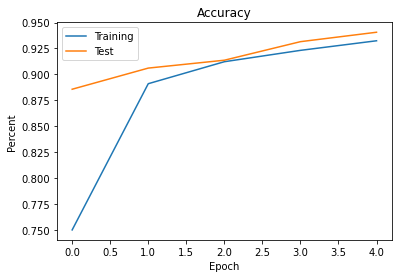

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Test'])

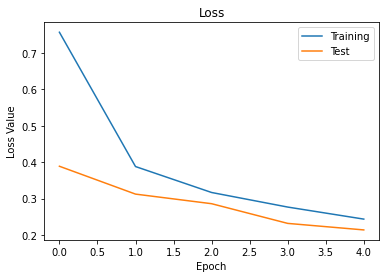

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Test'])

In [17]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 6s 20ms/step - loss: 0.2141 - accuracy: 0.9406


[0.21414391696453094, 0.9405999779701233]